In [1]:
import pandas as pd
import numpy as np

#Gerekli kütüphaneler import edildi.

In [2]:
data = pd.read_excel("titanic.xlsx") #"read_excel()" komutu ile veriyi çektik.
data.head() #Verinin ilk 5'i çağrıldı.

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [3]:
data.drop(['body','name','home.dest'], 1, inplace=True) #Gerekli olmayan değişkenler veriden atıldı.
data.head() #Verinin ilk 5'i çağrıldı.

,pclass,survived,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat
0,1,1,female,29.0000,0,0,24160,211.3375,B5,S,2
1,1,1,male,0.9167,1,2,113781,151.5500,C22 C26,S,11
2,1,0,female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN
3,1,0,male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN
4,1,0,female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN


In [4]:
data.describe() #Tanımlayıcı istatistikleri gösterdik. (ortalama, standart sapma vs.)

,pclass,survived,age,sibsp,parch,fare
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,2.294882,0.381971,29.881135,0.498854,0.385027,33.295479
std,0.837836,0.486055,14.413500,1.041658,0.865560,51.758668
min,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200


In [5]:
data.isnull().sum() #Boş veri olup olmadığı bu şekilde kontrol edilir.

pclass         0
survived       0
sex            0
age          263
sibsp          0
parch          0
ticket         0
fare           1
cabin       1014
embarked       2
boat         823
dtype: int64

In [6]:
#Boş verilerin olduğu görülüyor. Bu boş verilere ortanca değer veriyoruz.

In [7]:
data["age"].fillna(data["age"].median(), inplace=True)
data["fare"].fillna(data["fare"].median(), inplace=True)
data.describe()

,pclass,survived,age,sibsp,parch,fare
count,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000
mean,2.294882,0.381971,29.503183,0.498854,0.385027,33.281086
std,0.837836,0.486055,12.905246,1.041658,0.865560,51.741500
min,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000
25%,2.000000,0.000000,22.000000,0.000000,0.000000,7.895800
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200
75%,3.000000,1.000000,35.000000,1.000000,0.000000,31.275000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200


In [8]:
data.corr()["survived"].sort_values()

pclass     -0.312469
age        -0.043818
sibsp      -0.027825
parch       0.082660
fare        0.244414
survived    1.000000
Name: survived, dtype: float64

In [9]:
# Birbirleri arasındaki ilişkiyi bu şekilde kontrol edebiliriz.

<AxesSubplot:>

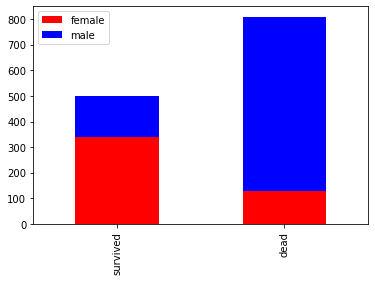

In [10]:
import matplotlib.pyplot as plt #Çizdirmek için matplotlib kütüphanesini çağırdık.
colors = ["r", "b","k"] #Renkleri belirledik.
survived_ = data[data["survived"]== 1]["sex"].value_counts() #Cinsiyete göre hayatta kalma sayısı
dead_ = data[data["survived"]==0]["sex"].value_counts() #Cinsiyete göre ölenlerin sayısı
data_ = pd.DataFrame([survived_, dead_]) #Değişkenleri dataFrame'e aktardık ki çizdirme işlemini yapabilelim.
data_.index = ["survived","dead"] #Index isimlerini verdik.
data_.plot.bar(stacked=True,color=colors) #Çizdirme işlemini yaptık. Burada bar grafiği kullanıldı.

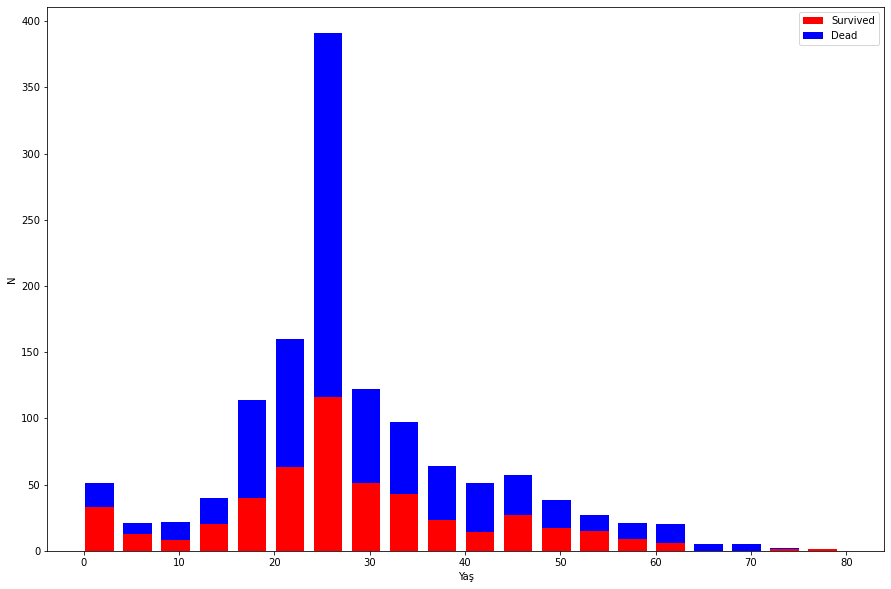

In [11]:
fig = plt.figure(figsize=(15,10)) #Grafiğin boyutları belirlendi.
plt.hist([data[data["survived"]==1]["age"], data[data["survived"]==0]["age"]],histtype='bar',stacked=True,bins=20,color=["r","b"],width=3, label=["Survived","Dead"])
#Yaşa göre hayatta kalma grafiği çizdirmek istendi. Bunun için histogram grafiği kullanıldı.
plt.xlabel("Yaş") #X ekseni="Yaş"
plt.ylabel("N") #Y ekseni="N"(Toplam sayı)
plt.legend()

C:\Users\ertug\anaconda3\envs\tf\lib\site-packages\seaborn\categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\ertug\anaconda3\envs\tf\lib\site-packages\seaborn\categorical.py:3710: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


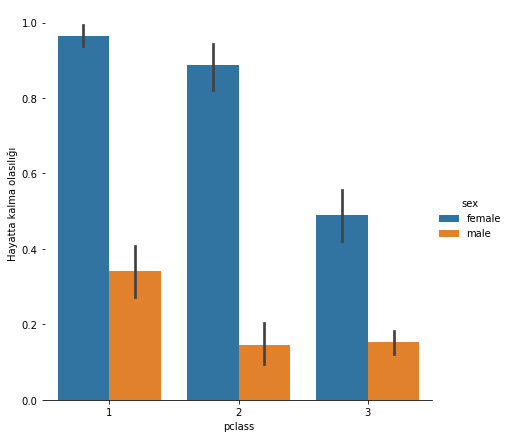

In [12]:
import seaborn as sns #Çizdirmek için farklı bir kütüphane olan "seaborn" kütüphanesi kullanıldı.
g = sns.factorplot(x="pclass", y="survived", hue="sex", data=data, size=6, kind="bar")
g.despine(left=True)
g.set_ylabels("Hayatta kalma olasılığı")
plt.show()

In [13]:
sex = pd.get_dummies(data["sex"],drop_first=True)
embark = pd.get_dummies(data["embarked"],drop_first=True)
#"sex" ve "embark" verisi sayısal bir veri değil fakat bunları da işin içine katmak istediğimiz için sayısal değerlere çevirdik.
#Bunun için "get_dummies()" fonksiyonunu kullandık.
data_ = pd.concat([data, sex, embark], axis=1)
data_.drop(["sex","embarked","ticket","cabin","boat"], axis=1, inplace=True)

In [14]:
#Modeli eğitme adımı:

In [15]:
X = data_.drop("survived", axis=1) #X değişkenlerimizi belirledik.
y = data_["survived"] #Y değişkenini belirledik.

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
#Veriyi "train-test" şeklinde ikiye ayırdık. (Train: %70, Test: %30 şeklinde.)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)
#X değişkenleri farklı birimler olduğu için "normalizasyon" işlemi yaptık.

In [16]:
X #X'leri görmek için çalıştırıldı.

,pclass,age,sibsp,parch,fare,male,Q,S
0,1,29.0000,0,0,211.3375,0,0,1
1,1,0.9167,1,2,151.5500,1,0,1
2,1,2.0000,1,2,151.5500,0,0,1
3,1,30.0000,1,2,151.5500,1,0,1
4,1,25.0000,1,2,151.5500,0,0,1
...,...,...,...,...,...,...,...,...
1304,3,14.5000,1,0,14.4542,0,0,0
1305,3,28.0000,1,0,14.4542,0,0,0
1306,3,26.5000,0,0,7.2250,1,0,0
1307,3,27.0000,0,0,7.2250,1,0,0


In [17]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train_std, y_train) #Veri eğitime başladı.

prediction = lr.predict(X_test_std) #Burada test edildi.
from sklearn.metrics import classification_report
print(classification_report(y_test, prediction))
#Sonuçları görmek için bu komutlar kullanıldı.

              precision    recall  f1-score   support

           0       0.82      0.87      0.84       246
           1       0.76      0.67      0.71       147

    accuracy                           0.80       393
   macro avg       0.79      0.77      0.78       393
weighted avg       0.79      0.80      0.79       393



In [18]:
# %79'luk bir doğrulukla doğru tahmin etmektedir.

## Katsayılar

In [19]:
print(lr.intercept_) #Beta0 katsayısını göstermek için bu çalıştırılır.
print(lr.coef_) #X'lerin katsayısını göstermek için (ne kadar X varsa) bu çalıştırılır.

[-0.63627627]
[[-0.76877813 -0.37406353 -0.40592601  0.01068203  0.02275705 -1.23693963
  -0.12152435 -0.26833188]]


In [20]:
#Görüldüğü üzere Beta0 katsayısını ve X'lerin katsayılarını ekrana gösterdi.
#Burada 8 tane X değişkeni göstermesinin sebebi bizim 8 tane bağımsız değişkenlerimizin(X'lerimizin) olmasından dolayıdır.
#Okunaklı hale çevirecek olursak:

In [21]:
Y = [-0.63627627]
X = [-0.76877813, -0.37406353, -0.40592601,  0.01068203,  0.02275705, -1.23693963, -0.12152435, -0.26833188]

In [22]:
print(f"Y = {Y[0]}(Beta0) \n + {X[0]} * X1 \n + {X[1]} * X2 \n + {X[2]} * X3 \n + {X[3]} * X4 \n + {X[4]} * X5 \n + {X[5]} * X6 \n + {X[6]} * X7 \n + {X[7]} * X8")

Y = -0.63627627(Beta0) 
 + -0.76877813 * X1 
 + -0.37406353 * X2 
 + -0.40592601 * X3 
 + 0.01068203 * X4 
 + 0.02275705 * X5 
 + -1.23693963 * X6 
 + -0.12152435 * X7 
 + -0.26833188 * X8


In [23]:
data_.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    1309 non-null   int64  
 1   survived  1309 non-null   int64  
 2   age       1309 non-null   float64
 3   sibsp     1309 non-null   int64  
 4   parch     1309 non-null   int64  
 5   fare      1309 non-null   float64
 6   male      1309 non-null   uint8  
 7   Q         1309 non-null   uint8  
 8   S         1309 non-null   uint8  
dtypes: float64(2), int64(4), uint8(3)
memory usage: 65.3 KB


In [24]:
#Burada da görüldüğü gibi "survived" bizim Y değişkenimiz iken, diğerleri yani kalan 8 değişkenler bizim X değişkenlerimizdir.